In [1]:
import pydot
import random
import math
import matplotlib.pyplot as plt
import networkx as nx
import math

## Assignment 1

### Parsing dot file

In [2]:
def parse_dot_file(file_path):
    graph = pydot.graph_from_dot_file(file_path)[0]  # Get the first graph from the list
    nodes = []
    edges = []
    for node in graph.get_nodes():
        nodes.append(node.get_name())
    for edge in graph.get_edges():
        source = edge.get_source()
        target = edge.get_destination()
        attributes = edge.get_attributes()
        edges.append((source, target, attributes))
    return nodes, edges

file_path = "D:/OneDrive - Universiteit Utrecht/Universiteit/3DataVisualisation/DataSet/polblogs.dot"
#LesMiserables, LeagueNetwork, polblogs
nodes, edges = parse_dot_file(file_path)

print("Nodes:", nodes)
print("Edges:")
for edge in edges:
    print(edge)


Nodes: ['"100monkeystyping.com"', '"12thharmonic.com/wordpress"', '"40ozblog.blogspot.com"', '"4lina.tblog.com"', '"750volts.blogspot.com"', '"95theses.blogspot.com"', '"abbadabbaduo.blogspot.com"', '"aboutpolitics.blogspot.com"', '"achingandspinning.blogspot.com"', '"ackackack.com"', '"adamtalib.blogspot.com"', '"adviceforlefty.blogspot.com"', '"agonist.org"', '"aintnobaddude.com"', '"ajbenjaminjr.blogspot.com"', '"alicublog.blogspot.com"', '"allanjenkins.typepad.com"', '"allspinzone.blogspot.com"', '"alphapredator.com/wdtgw.htm"', '"alternateworlds.blogspot.com"', '"althippo.blogspot.com"', '"alvintostig.typepad.com"', '"americablog.blogspot.com"', '"americablog.org"', '"americandreamslost.blogspot.com"', '"americanmuslim.blogs.com"', '"americanpolitics.com"', '"americansforbayh.blogspot.com"', '"amleft.blogspot.com"', '"amliberal.com/blog"', '"amptoons.com/blog"', '"anarchyxero.robfindlay.org"', '"andifeelfine.blogspot.com"', '"andymatic.com"', '"angrybear.blogspot.com"', '"angrydes

## Analyzing the edges

In [3]:
'''Adjacency matrix'''
num_nodes = len(nodes)
adj_matrix = [[0] * num_nodes for _ in range(num_nodes)]

for i, edge in enumerate(edges):
    source = edge[0]
    target = edge[1]
    weight = edge[2]
    adj_matrix[nodes.index(source)][nodes.index(target)] = 1

print("Adjacency Matrix:")
print(nodes)
print(adj_matrix)

'''writing the nodes and the edges on a txt file'''
with open('step1Matrix.txt', 'w') as file:
    for item in adj_matrix:
            file.write(" ".join(map(str,item)))
            file.write("\n")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
'''Read adjacency matrix from the text file'''
def read_adjacency_matrix(file_path):
    # Read the text file
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Process each line
    adjacency_matrix = []
    for line in lines:
        # Split the line by spaces, remove whitespace characters, convert to integers
        nums = [int(num) for num in line.strip().split()]
        # Append the list of integers to the result
        adjacency_matrix.append(nums)
    return adjacency_matrix

        
adjacency_matrix = read_adjacency_matrix("step1Matrix.txt")
print(adjacency_matrix)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
'''Adjacency Matrix (undirected) edge countings for each node'''
vertical_list = [] #target based
horizontal_list = [] #source based
for index, x in enumerate(adjacency_matrix):
    vertical_count = 0
    for y in adj_matrix:
        vertical_count += y[index]
    vertical_list.append(vertical_count)
    horizontal_list.append(x.count(1))
    
print(vertical_list)
print(horizontal_list)
total_edge_countings = [vertical_list[i]+horizontal_list[i] for i in range(len(vertical_list))]
print(total_edge_countings)

[12, 5, 0, 0, 1, 0, 1, 19, 0, 1, 0, 1, 48, 27, 16, 29, 1, 19, 1, 0, 10, 7, 68, 34, 0, 0, 22, 2, 24, 1, 41, 1, 2, 2, 54, 2, 2, 2, 27, 26, 2, 5, 0, 1, 4, 21, 2, 0, 0, 0, 1, 1, 6, 0, 263, 0, 0, 0, 1, 0, 0, 2, 0, 4, 33, 0, 2, 0, 0, 0, 0, 77, 4, 0, 50, 1, 0, 23, 3, 0, 2, 5, 1, 0, 57, 3, 5, 5, 49, 8, 0, 1, 0, 0, 2, 15, 6, 1, 86, 6, 4, 62, 0, 1, 2, 1, 3, 0, 12, 1, 0, 0, 1, 29, 40, 0, 0, 47, 75, 0, 0, 0, 2, 1, 0, 0, 9, 1, 0, 15, 0, 0, 2, 0, 0, 6, 2, 1, 0, 19, 2, 2, 2, 72, 33, 0, 0, 0, 0, 100, 1, 0, 0, 80, 337, 26, 2, 1, 27, 3, 0, 9, 0, 0, 5, 0, 32, 9, 0, 90, 1, 66, 0, 0, 0, 0, 0, 1, 2, 118, 8, 0, 0, 0, 3, 13, 32, 1, 101, 1, 33, 8, 1, 4, 0, 0, 0, 0, 0, 3, 0, 44, 1, 18, 9, 0, 0, 0, 8, 70, 0, 0, 2, 0, 1, 0, 0, 46, 0, 6, 0, 1, 1, 15, 0, 0, 7, 0, 28, 0, 0, 0, 56, 0, 0, 0, 2, 3, 0, 0, 10, 0, 3, 0, 10, 2, 0, 45, 24, 0, 0, 1, 1, 0, 0, 8, 0, 0, 11, 0, 0, 0, 0, 14, 0, 0, 1, 12, 1, 0, 0, 1, 4, 0, 5, 38, 0, 23, 2, 1, 1, 6, 6, 0, 0, 0, 1, 33, 2, 0, 1, 5, 0, 0, 6, 0, 109, 2, 4, 4, 80, 0, 1, 0, 0, 0, 1, 0, 0

## MatplotLib Graph Drawing

The perfect structure (drawing conventions):
- Edges vertical/horizontal
- Symmetry
- Minimal graph size
- Maximal simple open curves
- Stress of layout (backpath not too long/too short)

The tree structure:
- Equal Distances between vertices
- Layered

goals (quality metrics):
- Minimum number of slopes
- Minimum number of corners bends
- Minimum intersections

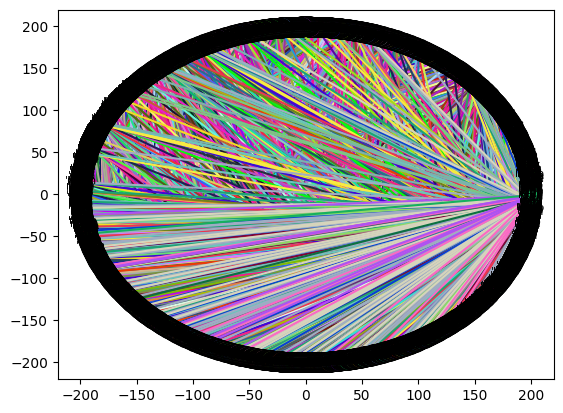

In [9]:
# Function to arrange nodes in a square-like layout
def arrange_in_square(nodes):
    num_nodes = len(nodes)
    side_length = int(math.ceil(math.sqrt(num_nodes)))
    spacing = 50
    start_x, start_y = -((side_length - 1) * spacing) / 2, ((side_length - 1) * spacing) / 2
    node_positions = {}
    current_x, current_y = start_x, start_y
    for i, node in enumerate(nodes):
        node_positions[node] = (current_x, current_y)
        current_x += spacing

        if (i + 1) % side_length == 0:
            current_x = start_x
            current_y -= spacing  # Move to the next row
    return node_positions

def arrange_in_radial(nodes):
    num_nodes = len(nodes)
    radius = 200
    angle_step = 360 / num_nodes
    node_positions = {}
    for i, node in enumerate(nodes):
        angle = math.radians(i * angle_step)
        x = radius * math.cos(angle)
        y = radius * math.sin(angle)
        node_positions[node] = (x, y)
    return node_positions

def arrange_in_semi_square(nodes):
    num_nodes = len(nodes)
    side_length = int(math.ceil(math.sqrt(num_nodes)))  # Calculate the side length of the square
    spacing = 60  # Spacing between nodes
    start_x, start_y = -((side_length - 1) * spacing) / 2, ((side_length - 1) * spacing) / 2
    node_positions = {}
    current_x, current_y = start_x, start_y
    for i, node in enumerate(nodes):
        node_positions[node] = (current_x, current_y + random.randint(-15, 15))
        current_x += spacing

        if (i + 1) % side_length == 0:
            current_x = start_x
            current_y -= spacing  # Move to the next row

    return node_positions

# Main function to draw the node-link diagram using Matplotlib
def draw_node_link_diagram(nodes, edges, structure='square', node_size=300):
    fig, ax = plt.subplots()
    
    #add random color to each node (as node:colorvalue)
    node_colors = {}
    for node in nodes:
        node_colors[node] = "#" + ''.join(random.choices('0123456789ABCDEF', k=6)) #create random 6 hex code for color (which networkx uses)
    
    # Arrange nodes in a structure
    if structure =='square':
        node_positions = arrange_in_square(nodes)
    elif structure == 'radial':
        node_positions = arrange_in_radial(nodes)
    elif structure == 'semi_square':
        node_positions = arrange_in_semi_square(nodes)
        
    # Draw nodes and labels
    for node, pos in node_positions.items():
        ax.scatter(pos[0], pos[1], s=node_size, color=node_colors[node], edgecolors='black', zorder=5)  # Draw node
        ax.text(pos[0], pos[1], node[0:4], ha='center', va='center', fontsize=8, zorder=10)  # Add label

    # Draw edges
    for edge in edges:
        source, target, _ = edge
        start = node_positions[source]
        end = node_positions[target]
        
        ax.plot([start[0], end[0]], [start[1], end[1]], color=node_colors[source], zorder=0)  # Draw edge



    plt.show()

draw_node_link_diagram(nodes, edges, "radial", node_size=200)

## Discussion

The Graph drawing shows a complexity of Linear time, meaning O(log n), because it shows no nested loops nor have logarithm time complexity in each operation. Because of the use of the Turtle library, more Nodes can easily be added and because of the complex libary, there are a lot of extra handy functions to improve the layout of the graph. But because the turtle manually writes to the screen, meaning it is a color written paper meaning each node nor edges are not interactive at all. 

As a bonus algorithm, both semi-squared and circle are implemented to show that the structure really matters how the layout is build. The semi-squared layout shows what happens when each node random moves from the vertical line and improves the layout, because you can now identify edges that are in the same vertical line. The circle layout